### "TMDB Movie Mining : A TMDB Movie Review Journey from Raw Data to Insights to Recommendation!

In [ ]:
#Import Essential Libraries

In [3]:
import requests
import pandas as pd
import numpy as np
import json
import os
import fnmatch
pd.set_option('display.max_colwidth',100)

# Data Acquisition via API Call

In [370]:
# Function to write API call response into folder

def write_api_response_to_file(api_url, file_path):
    """
    Make an API call to the given URL, write the JSON response to a file,
    and save the file into the specified folder.

    Parameters:
        api_url (str): The URL of the API to call.
        folder_path (str): The path of the folder where the files will be saved.

    Returns:
        None."""
    try:
        # Make the API call
        response = requests.get(api_url)
        response.raise_for_status()  # Raise an exception for 4XX and 5XX status codes

        # Extract JSON data from the response
        json_data = response.json()

        # Write JSON data to file
        with open(file_path, 'w') as f:
            json.dump(json_data, f)
        
        print("Data written to", file_path)
    
    except Exception as e:
        print("Error:", e)



In [13]:
#Function to read content from json files and write the content into DataFrame 

import json
import os

def read_json_files(folder_path,filepattern):
    """
    Read all JSON files from a folder and return their contents as a list of dictionaries.

    Parameters:
        folder_path (str): Path to the folder containing JSON files.
        file_pattern(str)

    Returns:
       A dataframe from JSON content.
    """
    dfs = []

    # Iterate over all files in the folder
    read_json_files = [file for file in os.listdir(folder_path) if fnmatch.fnmatch(file, filepattern)]
    for file in read_json_files:
      file_path = os.path.join(folder_path, file)
      with open(file_path,'r') as file:
        
        file_content = file.read()
        
        df_json=pd.read_json(file_content)#note i had passed as list so that each key will contain the values as is,not a flattened out data
        
        dfs.append(df_json)
 # Concatenate all list of DataFrames into a single DataFrame along rows

    final_df = pd.concat(dfs, ignore_index=True)
    return final_df




#### API call to get the movie info

In [167]:
### API call-1 #Fetch API response (containing movie_id and overview) from 30 pages(each page containing over 20 movie information) and Write content into a seperate json files
## I have limited the number of pages to 30 as this is for POC purpose only.


total_pages=30
for i in range(1,total_pages+1):

  # Specify the API endpoint URL
  api_url = f'https://api.themoviedb.org/3/movie/top_rated?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US&page={i}'
  file_path = f'C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/output_movie_file_{i}.json'
# Call the function with the API URL and file path
  write_api_response_to_file(api_url, file_path)


Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/output_movie_file_1.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/output_movie_file_2.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/output_movie_file_3.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/output_movie_file_4.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/output_movie_file_5.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/output_movie_file_6.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/output_movie_file_7.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/output_movie_file_8.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/output_movie_file_9.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/output_movie_file_10.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/o

In [373]:
# Call function to Read movie json files into a dataframe:
folder_path = "C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/"
filepattern = "output_movie_file_*.json"
df_movie_info = read_json_files(folder_path,filepattern)
print(df_movie_info.head())

   page  \
0     1   
1     1   
2     1   
3     1   
4     1   

                                                                                               results  \
0  {'adult': False, 'backdrop_path': '/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg', 'genre_ids': [18, 80], 'id...   
1  {'adult': False, 'backdrop_path': '/rSPw7tgCH9c6NqICZef4kZjFOQ5.jpg', 'genre_ids': [18, 80], 'id...   
2  {'adult': False, 'backdrop_path': '/kGzFbGhp99zva6oZODW5atUtnqi.jpg', 'genre_ids': [18, 80], 'id...   
3  {'adult': False, 'backdrop_path': '/3f92DMBTFqr3wgXpfxzrb0qv8nG.jpg', 'genre_ids': [18, 36, 1075...   
4  {'adult': False, 'backdrop_path': '/qqHQsStV6exghCM7zbObuYBiYxw.jpg', 'genre_ids': [18], 'id': 3...   

   total_pages  total_results  
0          457           9134  
1          457           9134  
2          457           9134  
3          457           9134  
4          457           9134  


In [374]:
#Each page contains list of 20 movies and its overview
df_movie_info[df_movie_info["page"]==1]["page"].value_counts()

1    20
Name: page, dtype: int64

In [375]:
df_movie_info[df_movie_info["page"]==1]

,page,results,total_pages,total_results
0,1,"{'adult': False, 'backdrop_path': '/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg', 'genre_ids': [18, 80], 'id...",457,9134
1,1,"{'adult': False, 'backdrop_path': '/rSPw7tgCH9c6NqICZef4kZjFOQ5.jpg', 'genre_ids': [18, 80], 'id...",457,9134
2,1,"{'adult': False, 'backdrop_path': '/kGzFbGhp99zva6oZODW5atUtnqi.jpg', 'genre_ids': [18, 80], 'id...",457,9134
3,1,"{'adult': False, 'backdrop_path': '/3f92DMBTFqr3wgXpfxzrb0qv8nG.jpg', 'genre_ids': [18, 36, 1075...",457,9134
4,1,"{'adult': False, 'backdrop_path': '/qqHQsStV6exghCM7zbObuYBiYxw.jpg', 'genre_ids': [18], 'id': 3...",457,9134
5,1,"{'adult': False, 'backdrop_path': '/90ez6ArvpO8bvpyIngBuwXOqJm5.jpg', 'genre_ids': [35, 18, 1074...",457,9134
6,1,"{'adult': False, 'backdrop_path': '/mSDsSDwaP3E7dEfUPWy4J0djt4O.jpg', 'genre_ids': [16, 10751, 1...",457,9134
7,1,"{'adult': False, 'backdrop_path': '/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg', 'genre_ids': [18, 28, 80, ...",457,9134
8,1,"{'adult': False, 'backdrop_path': '/hiKmpZMGZsrkA3cdce8a7Dpos1j.jpg', 'genre_ids': [35, 53, 18],...",457,9134
9,1,"{'adult': False, 'backdrop_path': '/l6hQWH9eDksNJNiXWYRkWqikOdu.jpg', 'genre_ids': [14, 18, 80],...",457,9134


In [376]:
df_movie_info.head()

,page,results,total_pages,total_results
0,1,"{'adult': False, 'backdrop_path': '/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg', 'genre_ids': [18, 80], 'id...",457,9134
1,1,"{'adult': False, 'backdrop_path': '/rSPw7tgCH9c6NqICZef4kZjFOQ5.jpg', 'genre_ids': [18, 80], 'id...",457,9134
2,1,"{'adult': False, 'backdrop_path': '/kGzFbGhp99zva6oZODW5atUtnqi.jpg', 'genre_ids': [18, 80], 'id...",457,9134
3,1,"{'adult': False, 'backdrop_path': '/3f92DMBTFqr3wgXpfxzrb0qv8nG.jpg', 'genre_ids': [18, 36, 1075...",457,9134
4,1,"{'adult': False, 'backdrop_path': '/qqHQsStV6exghCM7zbObuYBiYxw.jpg', 'genre_ids': [18], 'id': 3...",457,9134


In [377]:
df_movie_info["results"].head(1).values

array([{'adult': False, 'backdrop_path': '/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg', 'genre_ids': [18, 80], 'id': 278, 'original_language': 'en', 'original_title': 'The Shawshank Redemption', 'overview': 'Framed in the 1940s for the double murder of his wife and her lover, upstanding banker Andy Dufresne begins a new life at the Shawshank prison, where he puts his accounting skills to work for an amoral warden. During his long stretch in prison, Dufresne comes to be admired by the other inmates -- including an older prisoner named Red -- for his integrity and unquenchable sense of hope.', 'popularity': 141.057, 'poster_path': '/q6y0Go1tsGEsmtFryDOJo3dEmqu.jpg', 'release_date': '1994-09-23', 'title': 'The Shawshank Redemption', 'video': False, 'vote_average': 8.711, 'vote_count': 25455}],
      dtype=object)

In [378]:
#Creating features from results column
df_movie_info["overview"]=df_movie_info["results"].apply(lambda x:x["overview"])
df_movie_info["movie_id"]=df_movie_info["results"].apply(lambda x:x["id"])
df_movie_info["original_language"]=df_movie_info["results"].apply(lambda x:x["original_language"])
df_movie_info["genre_id"]=df_movie_info["results"].apply(lambda x:x["genre_ids"])
df_movie_info['release_date']=df_movie_info["results"].apply(lambda x:x['release_date'])
df_movie_info['title']=df_movie_info["results"].apply(lambda x:x['title'])
df_movie_info['popularity']=df_movie_info["results"].apply(lambda x:x['popularity'])
df_movie_info['vote_average']=df_movie_info["results"].apply(lambda x:x['vote_average'])
df_movie_info['vote_count']=df_movie_info["results"].apply(lambda x:x['vote_count'])

In [379]:
df_movie_info[df_movie_info["title"]=='Inception']

,page,results,total_pages,total_results,overview,movie_id,original_language,genre_id,release_date,title,popularity,vote_average,vote_count
447,3,"{'adult': False, 'backdrop_path': '/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg', 'genre_ids': [28, 878, 12]...",457,9134,"Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his ta...",27205,en,"[28, 878, 12]",2010-07-15,Inception,102.824,8.367,35171


In [380]:
df_movie_info["movie_id"]

0         278
1         238
2         240
3         424
4         389
        ...  
599    555604
600     20941
601       614
602       500
603       935
Name: movie_id, Length: 604, dtype: int64

#### API call to get the cast and crew information

In [214]:
# ### API call-2 
#Fetch API response (containing cast and crew info) for the movies and Write content into a seperate json files
## I have limited the number of movies to 50 as this is for POC purpose only.

for i in df_movie_info["movie_id"].head(50):
     api_url=f'https://api.themoviedb.org/3/movie/{i}/credits?api_key=0ff537d323525617ee3b8916dbf95770'
     file_path = f'C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/credit_file_{i}.json'
    # Call the function with the API URL and file path
     write_api_response_to_file(api_url, file_path)


Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/credit_file_278.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/credit_file_238.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/credit_file_240.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/credit_file_424.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/credit_file_389.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/credit_file_19404.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/credit_file_129.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/credit_file_155.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/credit_file_496243.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/credit_file_497.json
Data written to C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/credit_file_372058.json
Data written 

In [382]:
#Read movie cast and crew json files and write the content into dataframe.


# Define the folder containing the JSON files
folder_path = 'C:/Users/Home/Datasceince_Nov18/POC_Work/movie_json/'

# Define the file pattern (e.g., '*.json' to match all JSON files)
file_pattern = 'credit_file*.json'

# List all JSON files in the folder
#json_files = [file for file in os.listdir(folder_path) if file.endswith('.json')]
json_files = [file for file in os.listdir(folder_path) if fnmatch.fnmatch(file, 'credit*.json')]

# Initialize an empty list to store data from JSON files
credits_df = []


# Iterate over each JSON file, read its content, and append to json_data list
for file in json_files:
    file_path = os.path.join(folder_path, file)
    with open(file_path,'r') as file:
        
        json_crew_cast=json.load(file)
        df_credits_json=pd.DataFrame([json_crew_cast])#note i had passed as list so that each key will contain the values as is,not a flattened out data
        credits_df.append(df_credits_json)
      


# Now you have all the data from JSON files in a DataFrame
df_movie_cast_credit=pd.concat(credits_df)
print(df_movie_cast_credit.head())

       id  \
0     100   
0  103663   
0   11216   
0   11878   
0     120   

                                                                                                  cast  \
0  [{'adult': False, 'gender': 2, 'id': 973, 'known_for_department': 'Acting', 'name': 'Jason Flemy...   
0  [{'adult': False, 'gender': 2, 'id': 1019, 'known_for_department': 'Acting', 'name': 'Mads Mikke...   
0  [{'adult': False, 'gender': 2, 'id': 24366, 'known_for_department': 'Acting', 'name': 'Philippe ...   
0  [{'adult': False, 'gender': 2, 'id': 7450, 'known_for_department': 'Acting', 'name': 'Toshirō Mi...   
0  [{'adult': False, 'gender': 2, 'id': 109, 'known_for_department': 'Acting', 'name': 'Elijah Wood...   

                                                                                                  crew  
0  [{'adult': False, 'gender': 2, 'id': 960, 'known_for_department': 'Sound', 'name': 'John Murphy'...  
0  [{'adult': False, 'gender': 1, 'id': 6797, 'known_for_department': 'Cos

In [383]:
print(df_movie_cast_credit.head())

       id  \
0     100   
0  103663   
0   11216   
0   11878   
0     120   

                                                                                                  cast  \
0  [{'adult': False, 'gender': 2, 'id': 973, 'known_for_department': 'Acting', 'name': 'Jason Flemy...   
0  [{'adult': False, 'gender': 2, 'id': 1019, 'known_for_department': 'Acting', 'name': 'Mads Mikke...   
0  [{'adult': False, 'gender': 2, 'id': 24366, 'known_for_department': 'Acting', 'name': 'Philippe ...   
0  [{'adult': False, 'gender': 2, 'id': 7450, 'known_for_department': 'Acting', 'name': 'Toshirō Mi...   
0  [{'adult': False, 'gender': 2, 'id': 109, 'known_for_department': 'Acting', 'name': 'Elijah Wood...   

                                                                                                  crew  
0  [{'adult': False, 'gender': 2, 'id': 960, 'known_for_department': 'Sound', 'name': 'John Murphy'...  
0  [{'adult': False, 'gender': 1, 'id': 6797, 'known_for_department': 'Cos

### API call to get the genre details

In [11]:
genre_url='https://api.themoviedb.org/3/genre/movie/list?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US'

In [12]:
#Write the genre data into json file

response_genre=requests.get(genre_url)

In [13]:
genre_data=response_genre.json()

In [14]:
with open('C:\\Users\\Home\\Datasceince_Nov18\\POC_Work\\movie_json\\genre_lookup.json','w') as file:
     json.dump(genre_data,file)

In [15]:
df_genre=pd.read_json('C:\\Users\\Home\\Datasceince_Nov18\\POC_Work\\movie_json\\genre_lookup.json')

In [16]:
df_genre

,genres
0,"{'id': 28, 'name': 'Action'}"
1,"{'id': 12, 'name': 'Adventure'}"
2,"{'id': 16, 'name': 'Animation'}"
3,"{'id': 35, 'name': 'Comedy'}"
4,"{'id': 80, 'name': 'Crime'}"
5,"{'id': 99, 'name': 'Documentary'}"
6,"{'id': 18, 'name': 'Drama'}"
7,"{'id': 10751, 'name': 'Family'}"
8,"{'id': 14, 'name': 'Fantasy'}"
9,"{'id': 36, 'name': 'History'}"


In [17]:
df_genre['id']=df_genre["genres"].apply(lambda x:x['id'])
df_genre['name']=df_genre["genres"].apply(lambda x:x['name'])

In [384]:
df_genre

,genres,id,name
0,"{'id': 28, 'name': 'Action'}",28,Action
1,"{'id': 12, 'name': 'Adventure'}",12,Adventure
2,"{'id': 16, 'name': 'Animation'}",16,Animation
3,"{'id': 35, 'name': 'Comedy'}",35,Comedy
4,"{'id': 80, 'name': 'Crime'}",80,Crime
5,"{'id': 99, 'name': 'Documentary'}",99,Documentary
6,"{'id': 18, 'name': 'Drama'}",18,Drama
7,"{'id': 10751, 'name': 'Family'}",10751,Family
8,"{'id': 14, 'name': 'Fantasy'}",14,Fantasy
9,"{'id': 36, 'name': 'History'}",36,History


## Update the movie_info dataframe with genre name

In [385]:
#Taking a copy of original dataframe
final_df_1=df_movie_info.copy()

In [402]:
df_movie_info.head(2)

,page,results,total_pages,total_results,overview,movie_id,original_language,genre_id,release_date,title,popularity,vote_average,vote_count,new_genre_id
0,1,"{'adult': False, 'backdrop_path': '/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg', 'genre_ids': [18, 80], 'id...",457,9134,"Framed in the 1940s for the double murder of his wife and her lover, upstanding banker Andy Dufr...",278,en,"[18, 80]",1994-09-23,The Shawshank Redemption,141.057,8.711,25455,"[Drama, Crime]"
1,1,"{'adult': False, 'backdrop_path': '/rSPw7tgCH9c6NqICZef4kZjFOQ5.jpg', 'genre_ids': [18, 80], 'id...",457,9134,"Spanning the years 1945 to 1955, a chronicle of the fictional Italian-American Corleone crime fa...",238,en,"[18, 80]",1972-03-14,The Godfather,118.977,8.708,19375,"[Drama, Crime]"


In [387]:
dict(zip(df_genre["id"],df_genre["name"]))

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [388]:
genre_mapping={28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [389]:
df_movie_info["genre_id"].head(1)

0    [18, 80]
Name: genre_id, dtype: object

In [390]:
df_movie_info['new_genre_id'] = df_movie_info['genre_id'].apply(lambda genres: [genre_mapping.get(genre, genre) for genre in genres])

In [391]:
df_movie_info['new_genre_id']

0                           [Drama, Crime]
1                           [Drama, Crime]
2                           [Drama, Crime]
3                    [Drama, History, War]
4                                  [Drama]
                      ...                 
599    [Animation, Fantasy, Drama, Family]
600                           [Drama, War]
601                                [Drama]
602                      [Crime, Thriller]
603                          [Comedy, War]
Name: new_genre_id, Length: 604, dtype: object

In [392]:
df_movie_info.head()

,page,results,total_pages,total_results,overview,movie_id,original_language,genre_id,release_date,title,popularity,vote_average,vote_count,new_genre_id
0,1,"{'adult': False, 'backdrop_path': '/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg', 'genre_ids': [18, 80], 'id...",457,9134,"Framed in the 1940s for the double murder of his wife and her lover, upstanding banker Andy Dufr...",278,en,"[18, 80]",1994-09-23,The Shawshank Redemption,141.057,8.711,25455,"[Drama, Crime]"
1,1,"{'adult': False, 'backdrop_path': '/rSPw7tgCH9c6NqICZef4kZjFOQ5.jpg', 'genre_ids': [18, 80], 'id...",457,9134,"Spanning the years 1945 to 1955, a chronicle of the fictional Italian-American Corleone crime fa...",238,en,"[18, 80]",1972-03-14,The Godfather,118.977,8.708,19375,"[Drama, Crime]"
2,1,"{'adult': False, 'backdrop_path': '/kGzFbGhp99zva6oZODW5atUtnqi.jpg', 'genre_ids': [18, 80], 'id...",457,9134,"In the continuing saga of the Corleone crime family, a young Vito Corleone grows up in Sicily an...",240,en,"[18, 80]",1974-12-20,The Godfather Part II,84.422,8.591,11689,"[Drama, Crime]"
3,1,"{'adult': False, 'backdrop_path': '/3f92DMBTFqr3wgXpfxzrb0qv8nG.jpg', 'genre_ids': [18, 36, 1075...",457,9134,The true story of how businessman Oskar Schindler saved over a thousand Jewish lives from the Na...,424,en,"[18, 36, 10752]",1993-12-15,Schindler's List,71.107,8.572,15061,"[Drama, History, War]"
4,1,"{'adult': False, 'backdrop_path': '/qqHQsStV6exghCM7zbObuYBiYxw.jpg', 'genre_ids': [18], 'id': 3...",457,9134,The defense and the prosecution have rested and the jury is filing into the jury room to decide ...,389,en,[18],1957-04-10,12 Angry Men,48.275,8.547,7988,[Drama]


In [393]:
df_movie_info.shape

(604, 14)

In [108]:
df_movie_cast_credit.shape

NameError: name 'df_movie_cast_credit' is not defined

## ****** This ends the POC on data acquisition**** ##

In [ ]:
### Through the POC We actually were able to test our connection to the tmdb website  and extract a subset of data from the website and create the movies and credits dataframes.

#### Next step would be to use the  movie dataset available on  kaggle for implementing the recommendation model.

## Building a basic recommendation system based on demographic filtering.

In [32]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [33]:
movies_5000=pd.read_csv('C:\\Users\\Home\\Datasceince_Nov18\\POC_Work\\tmdb_5000_movies\\tmdb_5000_movies.csv')
credits_5000=pd.read_csv('C:\\Users\\Home\\Datasceince_Nov18\\POC_Work\\tmdb_5000_credits\\tmdb_5000_credits.csv')

In [400]:
movies_5000.shape

(4803, 20)

In [404]:
movies_5000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [409]:
movies_5000.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp...",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, ...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporatio...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""GB"", ""name"": ""United ...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic is...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of t...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [407]:
movies_5000.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

#There are some nulls ,we will ignore them for now as we may not be required to use all the columns.

In [403]:
movies_5000.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [410]:
credits_5000.shape

(4803, 4)

In [411]:
credits_5000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [408]:
credits_5000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [412]:
credits_5000.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""credit_id"": ""5602a8a7c3a3685532001c9a"", ""gender"": ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""department"": ""Editing"", ""gender"": 0, ""id"": 1721, ""jo..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Sparrow"", ""credit_id"": ""52fe4232c3a36847f800b50d"", ""g...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""department"": ""Camera"", ""gender"": 2, ""id"": 120, ""job""..."


In [ ]:
# Let us merge these two dataframe.
# We can use movie_id column, which is common column and having unique values to merge both dataframes

In [414]:
movies_5000['id'].nunique()

4803

In [415]:
credits_5000['movie_id'].nunique()

4803

In [34]:
#I am renaming the movie_id column in credits

credits_5000.rename(columns={'movie_id':'id'},inplace=True)

In [417]:
credits_5000.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""credit_id"": ""5602a8a7c3a3685532001c9a"", ""gender"": ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""department"": ""Editing"", ""gender"": 0, ""id"": 1721, ""jo..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Sparrow"", ""credit_id"": ""52fe4232c3a36847f800b50d"", ""g...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""department"": ""Camera"", ""gender"": 2, ""id"": 120, ""job""..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""credit_id"": ""52fe4d22c3a368484e1d8d6b"", ""gender"": 2,...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""department"": ""Sound"", ""gender"": 2, ""id"": 153, ""job"":..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Batman"", ""credit_id"": ""52fe4781c3a36847f8139869"", ""g...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""department"": ""Sound"", ""gender"": 2, ""id"": 947, ""job"":..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""credit_id"": ""52fe479ac3a36847f813ea75"", ""gender"": 2...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""department"": ""Writing"", ""gender"": 2, ""id"": 7, ""job"":..."


In [35]:
df_movie_info=pd.merge(movies_5000,credits_5000,on='id')

In [36]:
df_movie_info.shape

(4803, 23)

In [425]:
df_movie_info.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp...",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, ...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporatio...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""credit_id"": ""5602a8a7c3a3685532001c9a"", ""gender"": ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""department"": ""Editing"", ""gender"": 0, ""id"": 1721, ""jo..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic is...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of t...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""na...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Sparrow"", ""credit_id"": ""52fe4232c3a36847f800b50d"", ""g...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""department"": ""Camera"", ""gender"": 2, ""id"": 120, ""job""..."


#We need to now find a metric for rating the movies. So for that we need to calculate the score for each movie and sort them to recommend it for the user. For calculating the score we can use the vote_average column from our dataset. To make the scoring more accurate I will be making use of IMDB’s weighted rating formulae to calculate the score for the movies.

#W=(Rv+Cm)/(v+m)
W=weighted rating
R=Average rating for the movie
v= number of votes for the movie
m=minimum votes required to be listed in top 250 movies
C=mean vote across whole report


In [38]:
#We have R and v readily available in the data.
#Let us calculate m and C.

m=df_movie_info['vote_count'].quantile(0.9)

In [436]:
#Threshold vote count required to be listed in the top movies
m

1838.4000000000015

In [39]:
#mean vote
C=df_movie_info['vote_average'].mean()

In [444]:
C

6.092171559442011

In [42]:
# getting list of movies as per threshold defined(0.9)

df_movie_top=df_movie_info.copy().loc[df_movie_info['vote_count']>=m]

In [449]:
df_movie_top.shape

(481, 23)

In [451]:
df_movie_top.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp...",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, ...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporatio...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""credit_id"": ""5602a8a7c3a3685532001c9a"", ""gender"": ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""department"": ""Editing"", ""gender"": 0, ""id"": 1721, ""jo..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic is...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of t...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""na...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Sparrow"", ""credit_id"": ""52fe4232c3a36847f800b50d"", ""g...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""department"": ""Camera"", ""gender"": 2, ""id"": 120, ""job""..."


Now we want to calculate the weighted rating using the IMDB formulae.

In [43]:
def calculate_w_score(x,m=m,C=C):
    v=x['vote_count']
    R=x['vote_average']
    return (v/(v+m)*R)+(m/(v+m)*C)

In [44]:
df_movie_top['w_score']=df_movie_top.apply(calculate_w_score,axis=1)

In [13]:
df_movie_top.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,w_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696


#Now let's sort our movies according to their score to understand which movies ranks higher. Let’s see the top 10 movies.

In [16]:
df_top_score.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,w_score
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,The Shawshank Redemption,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.059258
662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,Fight Club,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.939256
65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,The Dark Knight,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.920020
3232,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,Pulp Fiction,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",7.904645
96,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,Inception,8.1,13752,Inception,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",7.863239


#Let us plot a graph of most popular movies based on score and popularity and top big budget movies.

In [45]:
df_movie_top.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew', 'w_score'],
      dtype='object')

In [46]:
df_movie_top.release_date.head()

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [47]:
def extract_year(x):
    return x.split('-')[0]
    

    

In [48]:
df_movie_top['release_year']=df_movie_top['release_date'].apply(extract_year)

In [49]:
df_movie_top[['release_year','release_date']].head()

,release_year,release_date
0,2009,2009-12-10
1,2007,2007-05-19
2,2015,2015-10-26
3,2012,2012-07-16
4,2012,2012-03-07


In [50]:
df_movie_top.release_year.max()

'2016'

In [51]:
df_movie_top.sort_values('release_year',ascending=False)['release_year'].head()

26      2016
1682    2016
370     2016
91      2016
56      2016
Name: release_year, dtype: object

In [28]:
pwd

'C:\\Users\\Home\\Datasceince_Nov18\\POC_Work'

In [52]:
df_movie_top.to_csv('df_movie_top.csv')

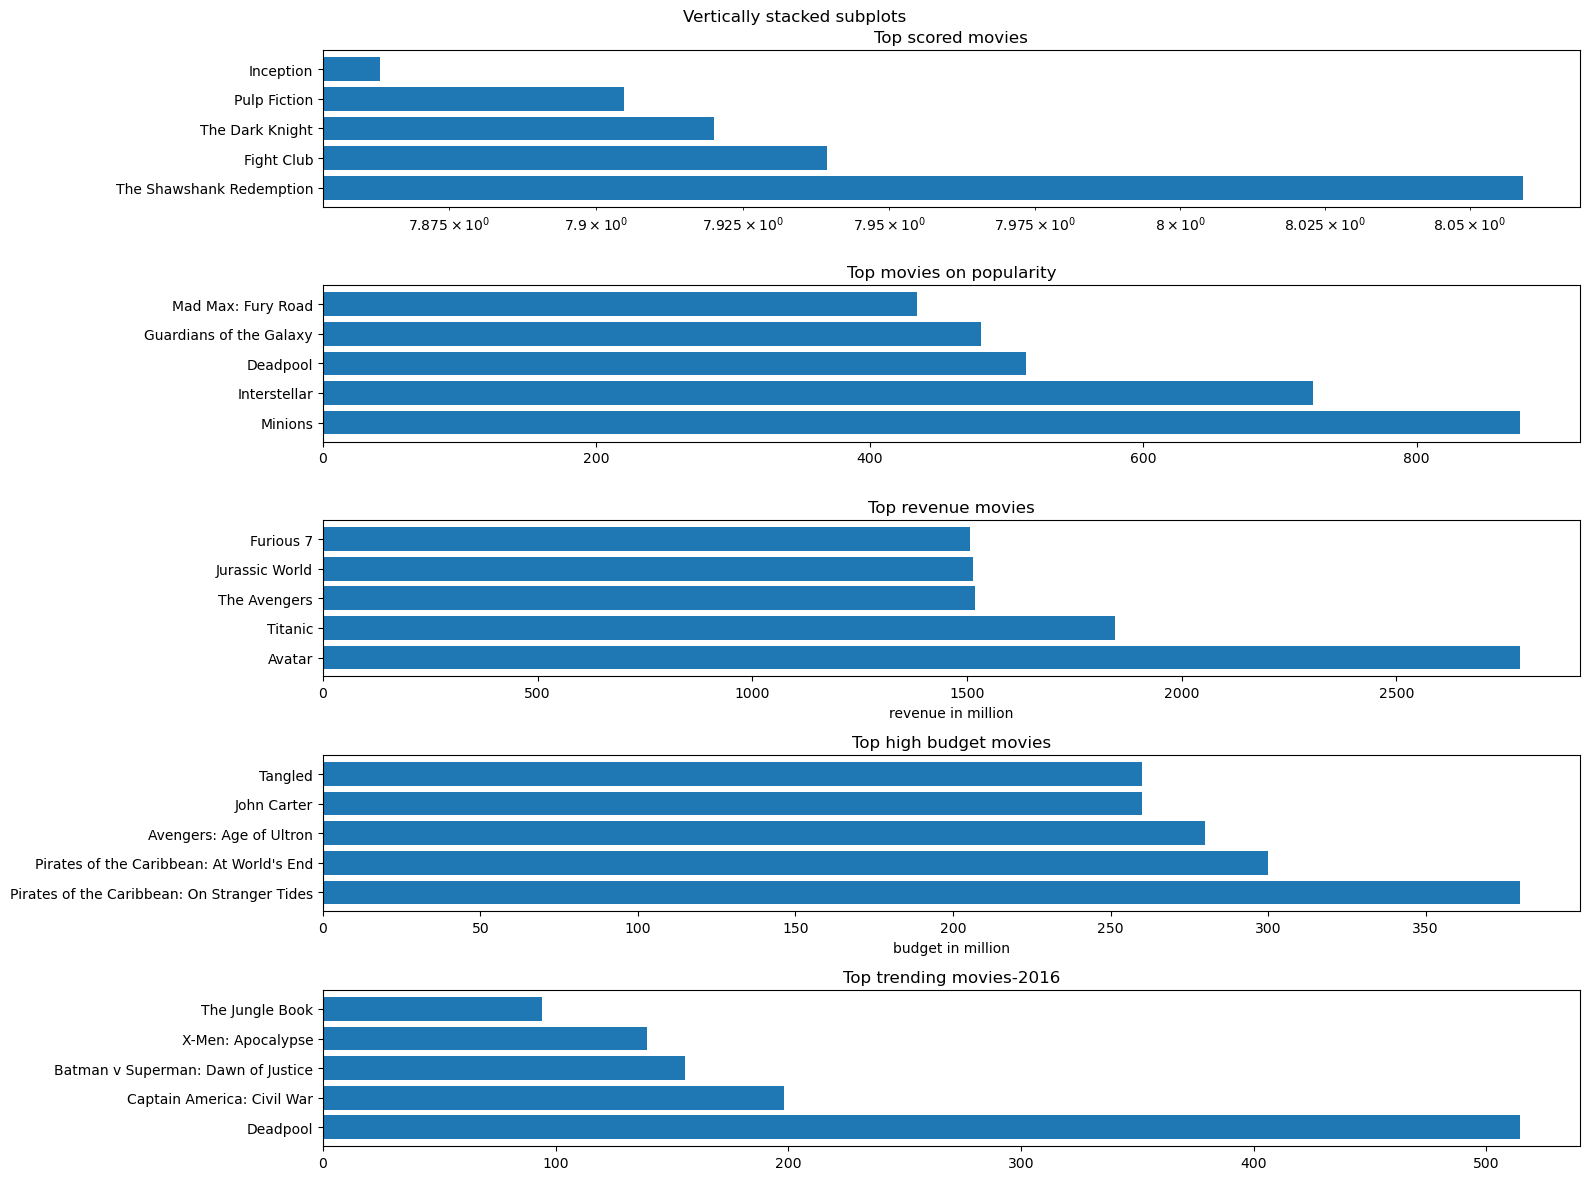

In [107]:
fig, axs = plt.subplots(5,figsize=(16, 12))
fig.suptitle('Vertically stacked subplots')


#Top score movies
df_top_score=df_movie_top.sort_values('w_score',ascending=False)
axs[0].barh(df_top_score['title_y'].head(5),df_top_score['w_score'].head(5))
axs[0].set_xscale('log')
axs[0].set_title('Top scored movies')

# # Second subplot
popularity=df_movie_top.sort_values('popularity',ascending=False)
axs[1].barh(popularity['title_y'].head(),popularity['popularity'].head(),align='center')
axs[1].set_title('Top movies on popularity')


# Third subplot
df_top_revenue=df_movie_top.sort_values('revenue',ascending=False)
axs[2].barh(df_top_revenue['title_y'].head(),(df_top_revenue['revenue']/1000000).head())
axs[2].set_xlabel('revenue in million')
axs[2].set_title('Top revenue movies')

# Fourth subplot
df_top_revenue=df_movie_top.sort_values('budget',ascending=False)
axs[3].barh(df_top_revenue['title_y'].head(),(df_top_revenue['budget']/1000000).head())
axs[3].set_xlabel('budget in million')
axs[3].set_title('Top high budget movies')



popularity=df_movie_top.sort_values('popularity',ascending=False)
top_trending_movies = popularity[popularity['release_year'] == popularity.release_year.max() ]
axs[4].barh(top_trending_movies['title_y'].head(),top_trending_movies['popularity'].head(),align='center')
axs[4].set_title('Top trending movies-2016')


plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

What we did above was a basic step for our recommendation systems known as demographic filtering.
This is a very high level way of approaching a recommendadtion system, where We can use this demographic filtering to recommend movies or shows based on their most_rated,popularity, budget etc.

##   Building a recommendation system based on content-based filtering.

### Feature Analysis

#######This would be content based recommendadtion system where we are going to create tags for each movie so i will be mostly interseted in text columns.

In [53]:
df_movie_info.shape

(4803, 23)

In [54]:
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [55]:
df_movie_info.head(3).transpose()

,0,1,2
budget,237000000,300000000,245000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/
id,19995,285,206647
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
original_language,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...
popularity,150.437577,139.082615,107.376788
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam..."


In [ ]:
#Feature extraction

In [ ]:
#I am only interested in the columns which tells me about the content of the movie.

In [56]:
df_movie_info.original_language.nunique()

37

In [57]:
lang_df = pd.DataFrame(df_movie_info['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,4505,en
fr,70,fr
es,32,es
zh,27,zh
de,27,de


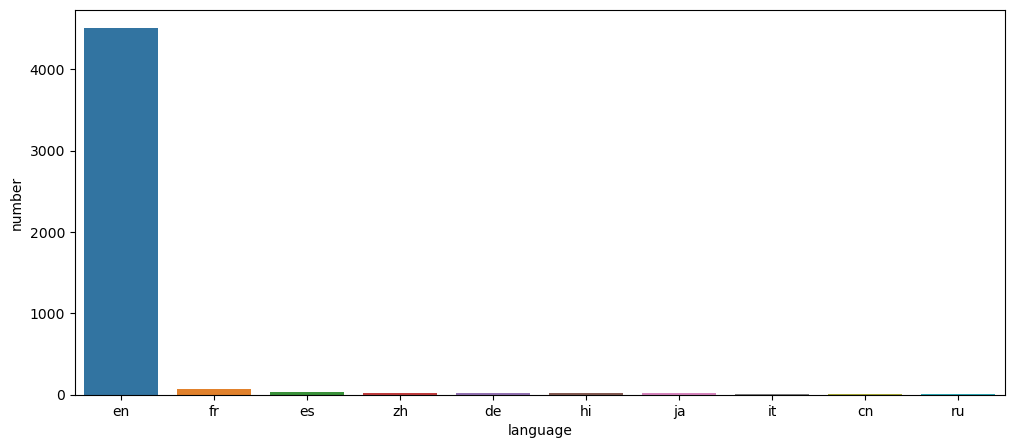

In [32]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[0:10])
plt.show()

In [ ]:
#We can see that english language is overwhelmingly high and other languages are very negligible.Considering language column could lead performance or issues with prediction.

In [58]:
#Defining new dataframe with only interesetd columns
imp_columns=['id','title_x','overview','genres','keywords','cast','crew']
movies=df_movie_info[imp_columns]



In [59]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4803 non-null   int64 
 1   title_x   4803 non-null   object
 2   overview  4800 non-null   object
 3   genres    4803 non-null   object
 4   keywords  4803 non-null   object
 5   cast      4803 non-null   object
 6   crew      4803 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.2+ KB


In [60]:
movies=movies.rename(columns={'title_x':'title','id':'movie_id'})

In [61]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Data Wrangling

In [ ]:
# We shall create tags from the columns containing characteristic of the movie.

In [60]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [62]:
movies_copy=movies.copy()

In [80]:
movies=movies_copy.copy()

In [81]:
movies_copy.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [ ]:
##Columns genres,keyword,cast and crew have similar structure where it is all list of dictionaries.

In [82]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [83]:
#Function to extract the name part from the obj and return it as list of names.

import ast
def extract_name(x):
    if x=='[]':  # There are few empty lists in the genre column hence handling it.
        return []  
    elif "name" in ast.literal_eval(x)[0]:  
       df_name=pd.read_json(x)
       return df_name["name"].tolist()
    
   
        

In [84]:
movies['new_genre']=movies['genres'].apply(extract_name)

In [85]:
movies['new_keyword']=movies['keywords'].apply(extract_name)

In [356]:
movies['new_keyword']

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4798    [united states–mexico barrier, legs, arms, pap...
4799                                                   []
4800    [date, love at first sight, narration, investi...
4801                                                   []
4802            [obsession, camcorder, crush, dream girl]
Name: new_keyword, Length: 4803, dtype: object

In [66]:
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [86]:
#Function to extract main top three cast members name.

def extract_name_3(x):
    if x=='[]':  # There are few empty lists in the genre column hence handling it.
        return []  
    elif "name" in ast.literal_eval(x)[0]:  
       df_name=pd.read_json(x)
       return df_name["name"][0:3].tolist()

In [87]:
movies['cast_new']=movies['cast'].apply(extract_name_3)

In [88]:
movies['cast_new']

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4798    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4799         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4800           [Eric Mabius, Kristin Booth, Crystal Lowe]
4801            [Daniel Henney, Eliza Coupe, Bill Paxton]
4802    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast_new, Length: 4803, dtype: object

In [89]:
ast.literal_eval(movies['crew'][1])

[{'credit_id': '52fe4232c3a36847f800b579',
  'department': 'Camera',
  'gender': 2,
  'id': 120,
  'job': 'Director of Photography',
  'name': 'Dariusz Wolski'},
 {'credit_id': '52fe4232c3a36847f800b4fd',
  'department': 'Directing',
  'gender': 2,
  'id': 1704,
  'job': 'Director',
  'name': 'Gore Verbinski'},
 {'credit_id': '52fe4232c3a36847f800b54f',
  'department': 'Production',
  'gender': 2,
  'id': 770,
  'job': 'Producer',
  'name': 'Jerry Bruckheimer'},
 {'credit_id': '52fe4232c3a36847f800b503',
  'department': 'Writing',
  'gender': 2,
  'id': 1705,
  'job': 'Screenplay',
  'name': 'Ted Elliott'},
 {'credit_id': '52fe4232c3a36847f800b509',
  'department': 'Writing',
  'gender': 2,
  'id': 1706,
  'job': 'Screenplay',
  'name': 'Terry Rossio'},
 {'credit_id': '52fe4232c3a36847f800b57f',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '52fe4232c3a36847f800b585',
  'department': 'Editing',
  'gender': 2,
 

In [90]:
def extract_director(x):
    L=[]
    for i in ast.literal_eval(x):
        if i["job"]=="Director":
            L.append(i["name"])
            break
    return L

In [91]:
movies["new_crew"]=movies["crew"].apply(extract_director)

In [92]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,new_genre,new_keyword,cast_new,new_crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [93]:
movies.columns

Index(['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew',
       'new_genre', 'new_keyword', 'cast_new', 'new_crew'],
      dtype='object')

In [70]:
movies.overview[0:2].values

array(['In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.',
       'Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.'],
      dtype=object)

In [436]:
movies.overview[0].split()

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

In [94]:
movies=movies.dropna(subset=['overview'],axis=0)

In [95]:
movies.shape

(4800, 11)

In [96]:
movies["new_overview"]=movies["overview"].apply(lambda x:x.split())

In [97]:
movies_copy_2=movies.copy()

In [160]:
movies=movies_copy_2.copy()

In [161]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,new_genre,new_keyword,cast_new,new_crew,new_overview
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [162]:
movies.drop(['genres','keywords','overview','cast','crew'],axis=1,inplace=True)

In [163]:
movies.head()

,movie_id,title,new_genre,new_keyword,cast_new,new_crew,new_overview
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [164]:
#### Removing spaces between words so that the recommendation system is able exactly identify which movie we are interested in.
movies["cast_new"]=movies["cast_new"].apply(lambda x:[i.replace(' ','') for i in x])
movies["new_genre"]=movies["new_genre"].apply(lambda x:[i.replace(' ','') for i in x])
movies["new_keyword"]=movies["new_keyword"].apply(lambda x:[i.replace(' ','') for i in x])
movies["new_crew"]=movies["new_crew"].apply(lambda x:[i.replace(' ','') for i in x])

In [165]:
# Let us now make one big list which will contain all the tags in one column
  
movies["tags"]=  movies["new_overview"] + movies["new_genre"] +  movies["new_keyword"] +  movies["cast_new"] + movies["new_crew"]

In [103]:
movies.tags[0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'JamesCameron']

In [166]:
# creating a new dataframe with only required columns

movie_new=movies[['movie_id',"title","tags"]]

In [167]:
movie_new_copy=movie_new.copy()

In [168]:
movie_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4800 non-null   int64 
 1   title     4800 non-null   object
 2   tags      4800 non-null   object
dtypes: int64(1), object(2)
memory usage: 279.0+ KB


In [169]:
movie_new.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [170]:
movie_new=movie_new.reset_index(drop=True)

In [85]:
movie_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4800 non-null   int64 
 1   title     4800 non-null   object
 2   tags      4800 non-null   object
dtypes: int64(1), object(2)
memory usage: 112.6+ KB


In [106]:
movie_new.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [171]:
#Converting tags from list to string

movie_new['tags'].iloc[0:5].apply(lambda x:' '.join(x))

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: tags, dtype: object

In [172]:
movie_new['tags']=movie_new['tags'].apply(lambda x:' '.join(x))

In [173]:
movie_new.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [174]:
#Converting all words to lowercase
movie_new['tags']=movie_new['tags'].apply(lambda x:x.lower())

In [175]:
movie_new.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


### Converting a corpus of text data into vectors using the bag-of-words model and CountVectorizer involves several steps

In [112]:
from sklearn.feature_extraction.text import CountVectorizer

In [113]:
cv=CountVectorizer(max_features=2000,stop_words='english')

In [114]:
cv.fit_transform(movie_new['tags']).toarray().shape

(4800, 2000)

In [115]:
vectors=cv.fit_transform(movie_new['tags']).toarray()

In [116]:
vectors[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [117]:
vectors.shape

(4800, 2000)

In [118]:
cv.get_feature_names()

C:\Users\Home\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '10',
 '11',
 '12',
 '15',
 '16',
 '17',
 '18',
 '1930s',
 '1950s',
 '1960s',
 '1970s',
 '1980s',
 '19th',
 '19thcentury',
 '20',
 '30',
 '3d',
 'aaroneckhart',
 'abandoned',
 'ability',
 'able',
 'abuse',
 'academy',
 'accident',
 'accidentally',
 'accused',
 'act',
 'action',
 'actions',
 'actor',
 'actress',
 'actually',
 'adam',
 'adamsandler',
 'adaptation',
 'addiction',
 'adoption',
 'adult',
 'adultery',
 'adventure',
 'adventures',
 'advice',
 'affair',
 'africa',
 'african',
 'aftercreditsstinger',
 'afterlife',
 'age',
 'agent',
 'agents',
 'aging',
 'ago',
 'agrees',
 'ahead',
 'aid',
 'air',
 'airplane',
 'airport',
 'alaska',
 'alcohol',
 'alcoholic',
 'alcoholism',
 'alecbaldwin',
 'alex',
 'alice',
 'alien',
 'alieninvasion',
 'aliens',
 'alive',
 'allies',
 'alpacino',
 'alter',
 'amazing',
 'ambitious',
 'america',
 'american',
 'americanfootball',
 'americans',
 'amnesia',
 'amp',
 'ancient',
 'anderson',
 'android',
 'andy',
 'angel',
 'angeles',
 'angelina

In [ ]:
### We can see that there are words like 'action','actions','actor','actors' which are created as different features.
### Since these words have similar meaning the features would become redundant.
### We shall apply stemming on the tags and then reinstantiate the countvectorizer object.

In [ ]:
#!pip install nltk

In [176]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [120]:
ps=PorterStemmer()

In [178]:
lm=WordNetLemmatizer()

In [121]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return ' '.join(y)

In [183]:
def lemm(text):
    y=[]
    for i in text.split():
        y.append(lm.lemmatize(i,pos="a"))
    return ' '.join(y)

In [123]:
movie_new['tags']=movie_new['tags'].apply(stem)

In [184]:
movie_new['tags']=movie_new['tags'].apply(lemm)

In [122]:
movie_new['tags'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [486]:
movie_new['tags'][1]

"captain barbossa, long believed to be dead, has come back to life and is headed to the edge of the earth with will turner and elizabeth swann. but nothing is quite as it seems. adventure fantasy action ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger johnnydepp orlandobloom keiraknightley goreverbinski"

In [124]:
movie_new['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [181]:
movie_new['tags'][0]#using lemmitization

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following order and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [185]:
movie_new['tags'][0] # using lemmitization with pos

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following order and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [498]:
movie_new['tags'][1]

"captain barbossa, long believ to be dead, ha come back to life and is head to the edg of the earth with will turner and elizabeth swann. but noth is quit as it seems. adventur fantasi action ocean drugabus exoticisland eastindiatradingcompani loveofone'slif traitor shipwreck strongwoman ship allianc calypso afterlif fighter pirat swashbuckl aftercreditssting johnnydepp orlandobloom keiraknightley goreverbinski"

In [182]:
movie_new['tags'][1]#using lemmitization

"captain barbossa, long believed to be dead, ha come back to life and is headed to the edge of the earth with will turner and elizabeth swann. but nothing is quite a it seems. adventure fantasy action ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger johnnydepp orlandobloom keiraknightley goreverbinski"

In [186]:
movie_new['tags'][1]  #using lemmitization with pos

"captain barbossa, long believed to be dead, ha come back to life and is headed to the edge of the earth with will turner and elizabeth swann. but nothing is quite a it seems. adventure fantasy action ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger johnnydepp orlandobloom keiraknightley goreverbinski"

In [125]:
#Re-deriving the vector after stemming
vectors=cv.fit_transform(movie_new['tags']).toarray()

In [126]:
vectors.shape

(4800, 2000)

In [127]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
cv.get_feature_names()

['000',
 '10',
 '11',
 '12',
 '14',
 '15',
 '16',
 '17',
 '18',
 '1930',
 '1950',
 '1960',
 '1970',
 '1980',
 '19th',
 '19thcenturi',
 '20',
 '30',
 '3d',
 'aaroneckhart',
 'abandon',
 'abduct',
 'abil',
 'abl',
 'abus',
 'academi',
 'accept',
 'accid',
 'accident',
 'accompani',
 'account',
 'accus',
 'achiev',
 'act',
 'action',
 'actor',
 'actress',
 'actual',
 'adam',
 'adamsandl',
 'adapt',
 'addict',
 'adopt',
 'adult',
 'adulteri',
 'adventur',
 'adventure',
 'advic',
 'affair',
 'affect',
 'africa',
 'african',
 'aftercreditssting',
 'afterlif',
 'ag',
 'age',
 'agent',
 'ago',
 'agre',
 'ahead',
 'aid',
 'air',
 'airplan',
 'airport',
 'al',
 'alaska',
 'alcohol',
 'alecbaldwin',
 'alex',
 'alic',
 'alien',
 'alieninvas',
 'aliv',
 'alive',
 'alli',
 'allow',
 'alon',
 'alpacino',
 'alreadi',
 'alter',
 'altern',
 'alway',
 'amaz',
 'ambiti',
 'ambush',
 'america',
 'american',
 'americanfootbal',
 'amnesia',
 'amp',
 'ancient',
 'anderson',
 'andi',
 'android',
 'angel',
 'an

# Using TF-IDF

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [133]:
tfidf=TfidfVectorizer(stop_words='english',max_features=2000)

In [134]:
vectors_tfidf=tfidf.fit_transform(movie_new['tags']).toarray()

In [135]:
vectors_tfidf.shape

(4800, 2000)

####### After stemming the features look as above.
######## Now these 2000 features are visualised in the multi dimensional vector space and each corpus is respresented as vector and cosine similarity is calculated between each vector representation.



## Importing cosine similarity metric

In [136]:
from sklearn.metrics.pairwise import cosine_similarity

In [137]:
similarity=cosine_similarity(vectors)

In [142]:
similarity_tfidf=cosine_similarity(vectors_tfidf)

In [143]:
similarity_tfidf

array([[1.        , 0.03319762, 0.04252655, ..., 0.03470797, 0.        ,
        0.        ],
       [0.03319762, 1.        , 0.01886615, ..., 0.02658758, 0.        ,
        0.00993539],
       [0.04252655, 0.01886615, 1.        , ..., 0.02363224, 0.        ,
        0.        ],
       ...,
       [0.03470797, 0.02658758, 0.02363224, ..., 1.        , 0.03063121,
        0.04379489],
       [0.        , 0.        , 0.        , ..., 0.03063121, 1.        ,
        0.03204806],
       [0.        , 0.00993539, 0.        , ..., 0.04379489, 0.03204806,
        1.        ]])

In [138]:
similarity

array([[1.        , 0.10567049, 0.10369517, ..., 0.05609927, 0.        ,
        0.        ],
       [0.10567049, 1.        , 0.07548514, ..., 0.03062819, 0.        ,
        0.03363364],
       [0.10369517, 0.07548514, 1.        , ..., 0.03005565, 0.        ,
        0.        ],
       ...,
       [0.05609927, 0.03062819, 0.03005565, ..., 1.        , 0.05205792,
        0.05356716],
       [0.        , 0.        , 0.        , ..., 0.05205792, 1.        ,
        0.11433239],
       [0.        , 0.03363364, 0.        , ..., 0.05356716, 0.11433239,
        1.        ]])

In [139]:
similarity.shape

(4800, 4800)

In [110]:
similarity[0]

array([1.        , 0.10567049, 0.10369517, ..., 0.05609927, 0.        ,
       0.        ])

In [510]:
similarity[1]

array([0.10567049, 1.        , 0.07548514, ..., 0.03062819, 0.        ,
       0.03363364])

I now do a reverse mapping of the movie titles and the indices of the dataframe which will help in identifying the index of a movie in our metadata dataframe.



In [139]:
movie_new.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


In [140]:
#Function(countvectoriser vector) which will get recommendations based on the movie title entered by the user.

def get_recommendation(x):
    movie_index=movie_new[movie_new['title'].str.lower()==x.lower()].index[0]
    distances=similarity[movie_index]
    movies_list_recommend=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]

    
    for j,k in movies_list_recommend:
        print(movie_new.iloc[j,1])
        

In [153]:
#Function(tfidf vector) which will get recommendations based on the movie title entered by the user.

def get_recommendation_tfidf(x):
    movie_index=movie_new[movie_new['title'].str.lower()==x.lower()].index[0]
    distances=similarity_tfidf[movie_index]
    movies_list_recommend=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]

    
    for j,k in movies_list_recommend:
        print(movie_new.iloc[j,1])

In [117]:
movie_new[movie_new['title']=='Avatar'].index[0]

0

In [141]:
get_recommendation('avatar')

Aliens vs Predator: Requiem
Falcon Rising
Independence Day
Jupiter Ascending
Titan A.E.


In [154]:
get_recommendation_tfidf('avatar')

Falcon Rising
Aliens
Aliens vs Predator: Requiem
Battle: Los Angeles
Apollo 18


In [146]:
get_recommendation('The Dark Knight Rises')

The Dark Knight
Batman Forever
Nighthawks
Slow Burn
Batman & Robin


In [155]:
get_recommendation_tfidf('The Dark Knight Rises')

The Dark Knight
Batman Returns
Batman Forever
Batman: The Dark Knight Returns, Part 2
Batman Begins


In [148]:
get_recommendation('Batman Begins')

The Dark Knight
10th & Wolf
Batman
Rockaway
Amidst the Devil's Wings


In [156]:
get_recommendation_tfidf('Batman Begins')

The Dark Knight
Batman v Superman: Dawn of Justice
The Dark Knight Rises
Batman Returns
Superman


In [159]:
get_recommendation('Spider-Man 3')

Spider-Man
Spider-Man 2
The Amazing Spider-Man 2
The Amazing Spider-Man
Arachnophobia


In [158]:
get_recommendation('Gandhi')

Mr. Turner
Ramanujan
Guiana 1838
The Wind That Shakes the Barley
Barry Lyndon


In [159]:
get_recommendation_tfidf('Gandhi')

Dil Jo Bhi Kahey...
A Passage to India
Guiana 1838
Neal 'n' Nikki
Bloody Sunday


In [172]:
get_recommendation('iron man')

Iron Man 3
Avengers: Age of Ultron
X-Men
Iron Man 2
The Avengers


In [161]:
get_recommendation('Ramanujan')

Mr. Turner
The R.M.
Love Happens
Mandela: Long Walk to Freedom
School for Scoundrels


In [157]:
get_recommendation_tfidf('Ramanujan')

Dil Jo Bhi Kahey...
A Passage to India
The Young Victoria
The Indian in the Cupboard
Shalako


In [174]:
get_recommendation('My date with drew')

Bad Grandpa
How to Fall in Love
The R.M.
Whale Rider
The Switch


In [173]:
movie_new[movie_new['title']=='Avengers: Age of Ultron']['tags'].values

array(['when toni stark tri to jumpstart a dormant peacekeep program, thing go awri and earth’ mightiest hero are put to the ultim test as the fate of the planet hang in the balance. as the villain ultron emerges, it is up to the aveng to stop him from enact hi terribl plans, and soon uneasi allianc and unexpect action pave the way for an epic and uniqu global adventure. action adventur sciencefict marvelcom sequel superhero basedoncomicbook vision superheroteam duringcreditssting marvelcinematicunivers 3d robertdowneyjr. chrishemsworth markruffalo josswhedon'],
      dtype=object)

In [163]:
movie_new[movie_new['title']=='Love Happens']['tags'].values

array(["dr. burk ryan is a success self-help author and motiv speaker with a secret. while he help thousand of peopl cope with tragedi and person loss, he secretli is unabl to overcom the death of hi late wife. it' not until burk meet a fierc independ florist name elois that he is forc to face hi past and overcom hi demons. drama romanc hotel florist forest grief seminar motivationalspeak aaroneckhart jenniferaniston judygr brandoncamp"],
      dtype=object)

In [151]:
movie_new[movie_new['title']=='Independence Day']['tags'].values

array(["on juli 2, a giant alien mothership enter orbit around earth and deploy sever dozen saucer-shap 'destroyer' spacecraft that quickli lay wast to major citi around the planet. on juli 3, the unit state conduct a coordin counterattack that fails. on juli 4, a plan is devis to gain access to the interior of the alien mothership in space, in order to plant a nuclear missile. action adventur sciencefict spacecraft patriot countdown independ invas war ufo extraterrestri spaceship alien battl willsmith billpullman jeffgoldblum rolandemmerich"],
      dtype=object)

In [144]:
movie_new[movie_new['title']=='Aliens vs Predator: Requiem'].index[0]

1213

In [146]:
movie_new[movie_new['title']=='Avatar'].index[0]

0

In [147]:
similarity[0][1213]

0.35073928015871675

In [149]:
sorted(similarity[0],reverse=True)

[1.0000000000000002,
 0.35073928015871675,
 0.33601075251612356,
 0.3143775102373477,
 0.3049247893083225,
 0.30016680568428156,
 0.2993421700446248,
 0.29129492773280685,
 0.2880092164423916,
 0.2743516305843672,
 0.27371875400769585,
 0.2732295333235123,
 0.2694079530401624,
 0.2621520601955984,
 0.2619812585311231,
 0.25883878884437284,
 0.25663245128736834,
 0.254000254000381,
 0.254000254000381,
 0.24906774069335896,
 0.24906774069335896,
 0.24722569302909872,
 0.24656448378672144,
 0.24650596604914954,
 0.2465059660491495,
 0.24287069628756647,
 0.2421797398482414,
 0.24000768036865966,
 0.2395837630279677,
 0.23789303403490328,
 0.23759548165574573,
 0.2375954816557457,
 0.23578313267801077,
 0.23346307108777453,
 0.233086618699226,
 0.22975187432024508,
 0.22470176588194152,
 0.22450662753346864,
 0.22450662753346864,
 0.21997067253202998,
 0.21796176586341728,
 0.2155263624321299,
 0.2155263624321299,
 0.2155263624321299,
 0.2155263624321299,
 0.2155263624321299,
 0.2141918210

In [ ]:
movie_new[movie_new['title']=='Aliens vs Predator: Requiem']['tags'].values

# Deployment

In [175]:
import pickle

In [181]:
pickle.dump(movie_new.to_dict(),open('C:\\Users\\Home\\Datasceince_Nov18\\POC_Work\\Recommendation_System\\movie_new_dict.pkl','wb'))
pickle.dump(similarity,open('C:\\Users\\Home\\Datasceince_Nov18\\POC_Work\\Recommendation_System\\similarity_vec.pkl','wb'))

In [176]:
pwd

'C:\\Users\\Home\\Datasceince_Nov18\\POC_Work'

In [ ]:
C:\\Users\\Home\\Datasceince_Nov18\\POC_Work\\Recommendation_System

In [6]:
def fetch_movie_poster(movie_id):
    response=requests.get(f'https://www.themoviedb.org/movie/{movie_id}/images/posters?api_key=0ff537d323525617ee3b8916dbf95770')
    print(type(response))

In [7]:
image=fetch_movie_poster(65)
print(image)

<class 'requests.models.Response'>
None


In [21]:
import pickle
movies_list = pickle.load(open('C:\\Users\\Home\\Datasceince_Nov18\\POC_Work\\Recommendation_System\\movie_new_dict.pkl','rb'))
movies = pd.DataFrame(movies_list)
movies_list_names=movies["title"].values



similarity=pickle.load(open('C:\\Users\\Home\\Datasceince_Nov18\\POC_Work\\Recommendation_System\\similarity_vec.pkl','rb'))

In [24]:
movies = pd.DataFrame(movies_list)

In [25]:
movies.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but be..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha come back to life and is head to the edg of the ear..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a trail to uncov a sinist organization. while m bat...
3,49026,The Dark Knight Rises,"follow the death of district attorney harvey dent, batman assum respons for dent' crime to prote..."
4,49529,John Carter,"john carter is a war-weary, former militari captain who' inexplic transport to the mysteri and e..."


In [26]:
def recommend(text):
    movie_index=movies_5000[movies_5000["title"].str.lower()==text.lower()].index[0]
    distance=sorted(list(enumerate(similarity[movie_index])),reverse=True,key=lambda x:x[1])[1:6]
    recommended=[]
    recom_movie_poster = []
    for i,k in distance:
        recommended.append(movies_5000.iloc[i,17])
        recom_movie_poster.append(fetch_movie_poster(movies_5000.iloc[i,3]))

    return recommended, recom_movie_poster


def fetch_movie_poster(movie_id):
    response=requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key=0ff537d323525617ee3b8916dbf95770')
    data=response.json()
    return "https://image.tmdb.org/t/p/w500/" + data['poster_path']



In [28]:
recommendations,movie_poster=recommend('Avatar')
for i in recommendations:
     print(i)
for i in movie_poster:
     #st.image(i, caption='Your Image', use_column_width=True)
    print(i)

Aliens vs Predator: Requiem
Anne of Green Gables
Independence Day
Jupiter Ascending
Titan A.E.
https://image.tmdb.org/t/p/w500//jCyJN1vj8jqJJ0vNw4hDH2KlySO.jpg
https://image.tmdb.org/t/p/w500//z1owlDzKO3DQpFKNFBnuQlPF891.jpg
https://image.tmdb.org/t/p/w500//p0BPQGSPoSa8Ml0DAf2mB2kCU0R.jpg
https://image.tmdb.org/t/p/w500//xzQ25m9vrdyvpLX74T3B3KB40Ou.jpg
https://image.tmdb.org/t/p/w500//el2iHk3LTJWfEnwrvcRkvWY501G.jpg
